In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

plt.rc("font", size=23)

In [8]:
pickle_directory = "combined/pickle_jar/"

percentage_inhibition = 0.0

gs_array = np.arange(10, 40)
num_neurons = 50

In [9]:
color_list = ["black", "red", "blue"]
spread_color_list = ["black", "red", "blue"]
marker_color_list = ["black", "red", "blue"]
marker_shape = ["o", "^", "s"]
labels_list = []

In [10]:
def plotting(percentage_inhibition):
    cv_for_all_networks = []
    for file in os.listdir(pickle_directory):
        if file.startswith("mega_cv") and f"percinh_{percentage_inhibition}" in file:
            print(file)
            with open(os.path.join(pickle_directory, file), "rb") as f:
                cv_array = pickle.load(f)
                cv_for_all_networks.append(cv_array)
                labels_list.append(f"r = {file[22:-16]}")

    mean_cv_for_all_networks = np.mean(cv_for_all_networks, axis=1)

    plt.figure(figsize=(10, 8))
    for index, network in enumerate(range(3)):
        plt.plot(gs_array, np.mean(mean_cv_for_all_networks[network], axis=1), marker=marker_shape[index], color=color_list[index], mec="black", mfc=marker_color_list[index], label=labels_list[index])
        plt.fill_between(gs_array, np.mean(mean_cv_for_all_networks[network], axis=1) + np.std(mean_cv_for_all_networks[network], axis=1), np.mean(mean_cv_for_all_networks[network], axis=1) - np.std(mean_cv_for_all_networks[network], axis=1), color=spread_color_list[index], alpha=0.1)
    #    plt.axvline(x=15, color=color_list[2], ls="-.")
    #    plt.axvline(x=15.5, color=color_list[1], ls="-.")
    #    plt.axvline(x=17, color=color_list[0], ls="-.")
    plt.axhline(y=0.5, ls=":")
    plt.xlabel("$g_s$")
    plt.ylabel("CV")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"cv_percinh_{percentage_inhibition}.png")
    plt.show()

mega_cv_modular_mixed_0.01_percinh_0.0.pkl
mega_cv_modular_mixed_100_percinh_0.0.pkl
mega_cv_modular_mixed_1_percinh_0.0.pkl


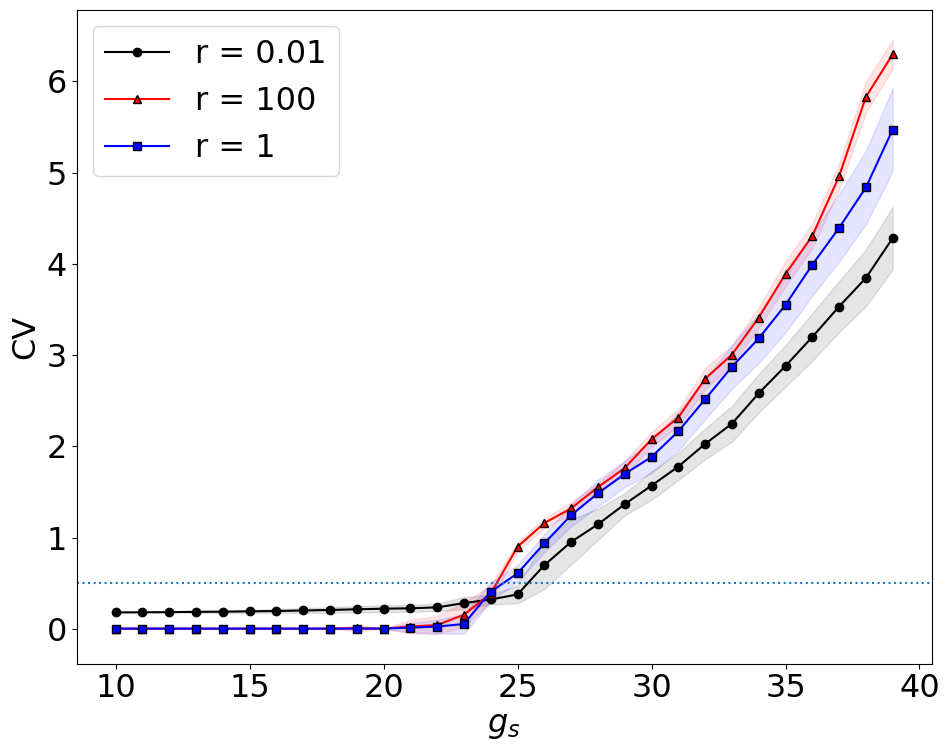

mega_cv_modular_mixed_0.01_percinh_0.1.pkl
mega_cv_modular_mixed_100_percinh_0.1.pkl
mega_cv_modular_mixed_1_percinh_0.1.pkl


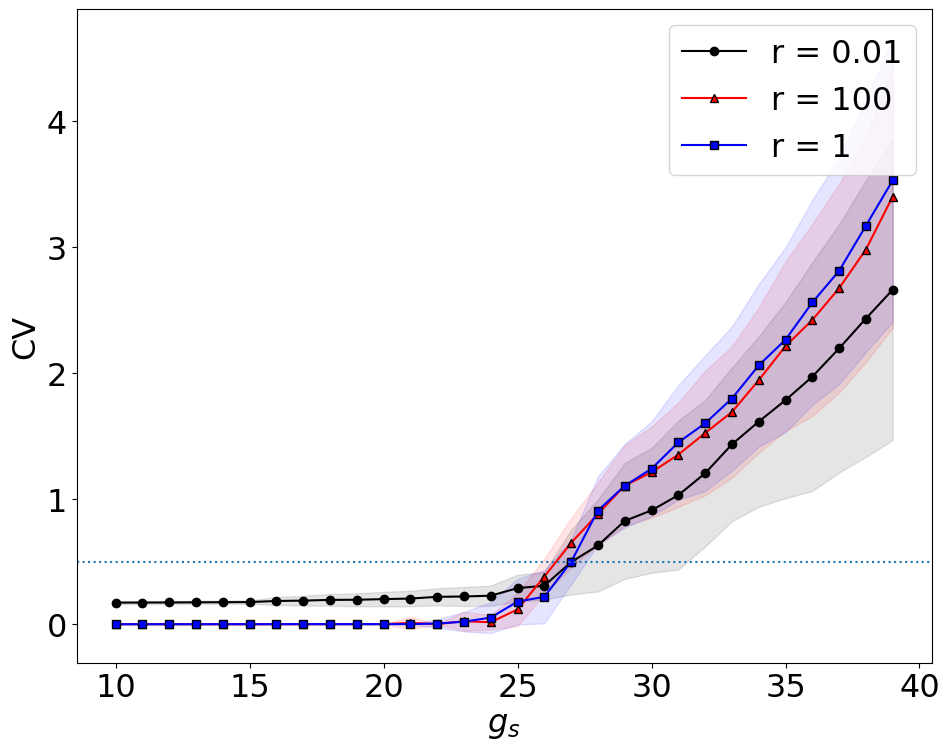

mega_cv_modular_mixed_0.01_percinh_0.2.pkl
mega_cv_modular_mixed_100_percinh_0.2.pkl
mega_cv_modular_mixed_1_percinh_0.2.pkl


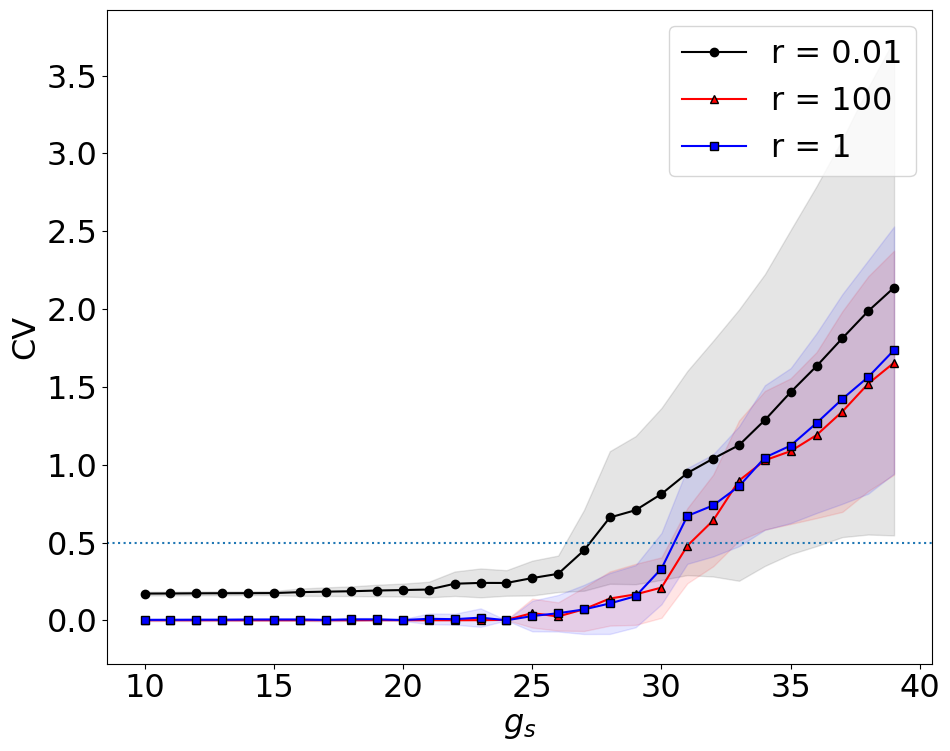

mega_cv_modular_mixed_0.01_percinh_0.3.pkl
mega_cv_modular_mixed_100_percinh_0.3.pkl
mega_cv_modular_mixed_1_percinh_0.3.pkl


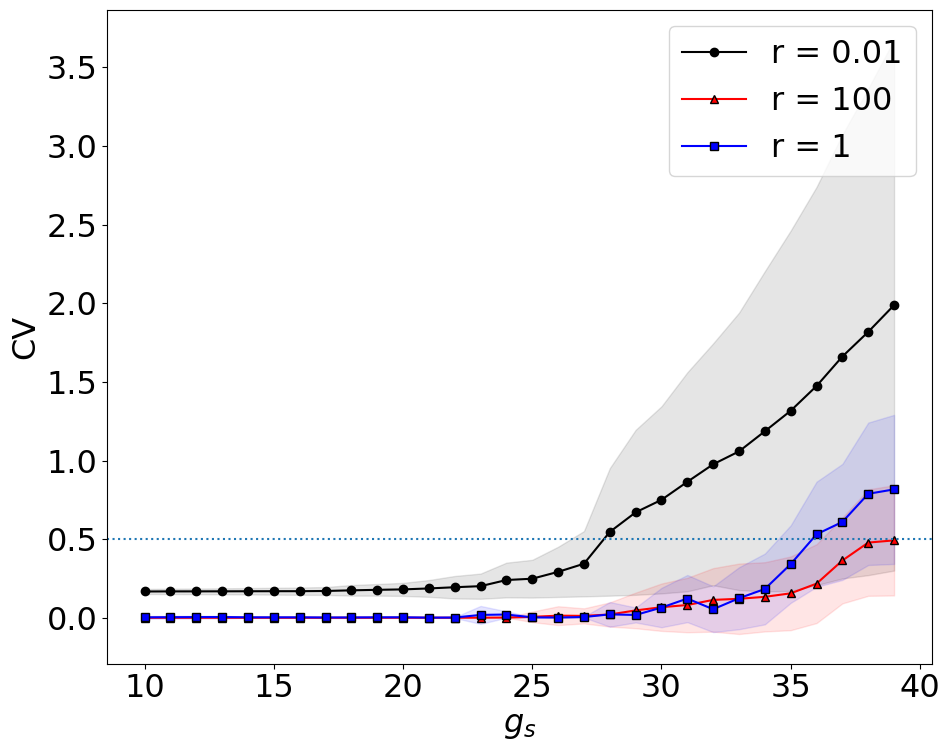

mega_cv_modular_mixed_0.01_percinh_0.5.pkl
mega_cv_modular_mixed_100_percinh_0.5.pkl
mega_cv_modular_mixed_1_percinh_0.5.pkl


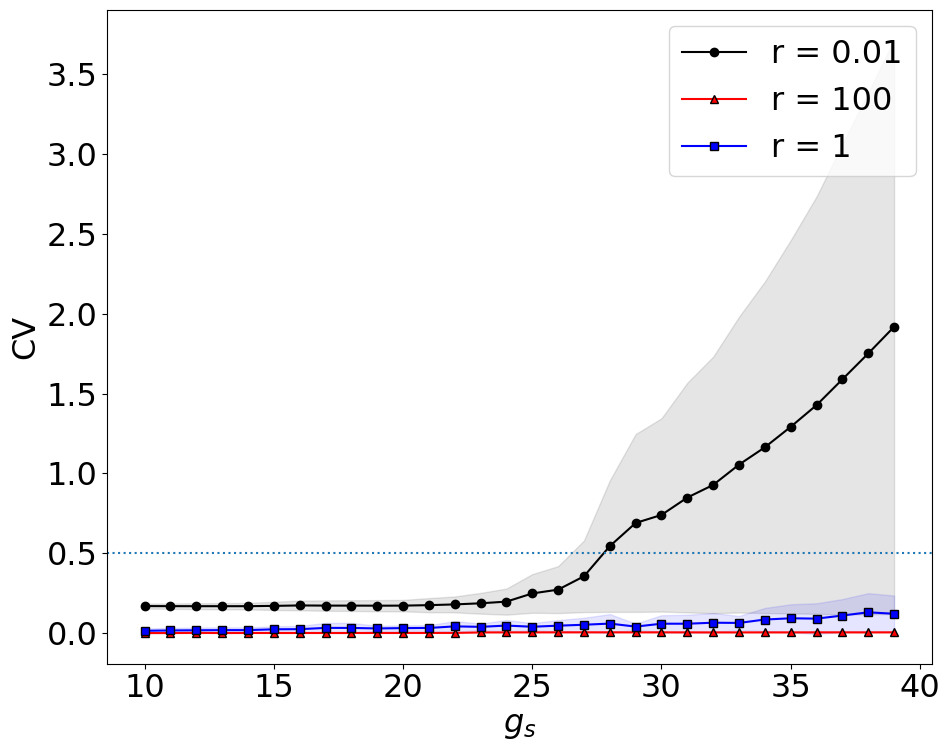

In [11]:
for perc in [0.0, 0.1, 0.2, 0.3, 0.5]:
    plotting(perc)

In [12]:
def num_bursting(percentage_inhibition):
    cv_for_all_networks = []
    for file in os.listdir(pickle_directory):
        if file.startswith("mega_cv") and f"percinh_{percentage_inhibition}" in file:
            print(file)
            with open(os.path.join(pickle_directory, file), "rb") as f:
                cv_array = pickle.load(f)
                cv_for_all_networks.append(cv_array)
                labels_list.append(f"r = {file[22:-16]}")

    mean_cv_for_all_networks = np.mean(cv_for_all_networks, axis=1)

    bursting_list = [[[] for _ in range(len(gs_array))] for _ in range(3)]
    for network in range(3):
        bursting_neurons = []
        for gs_index, gs in enumerate(gs_array):
            for neuron in range(50):
                if (mean_cv_for_all_networks[network][gs_index][neuron]) > 0.5:
                    bursting_neurons.append(neuron)

            bursting_list[network][gs_index] = len(set(bursting_neurons))/num_neurons

    plt.figure(figsize=(10, 8))
    for network in range(3):
        plt.plot(gs_array, bursting_list[network], marker=marker_shape[network], color=color_list[network], label=labels_list[network], mec="black", mfc=marker_color_list[network])
    plt.xlabel("$g_s$")
    plt.ylabel("Fraction of bursting neurons")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"num_percinh_{percentage_inhibition}.png")
    plt.show()

mega_cv_modular_mixed_0.01_percinh_0.0.pkl
mega_cv_modular_mixed_100_percinh_0.0.pkl
mega_cv_modular_mixed_1_percinh_0.0.pkl


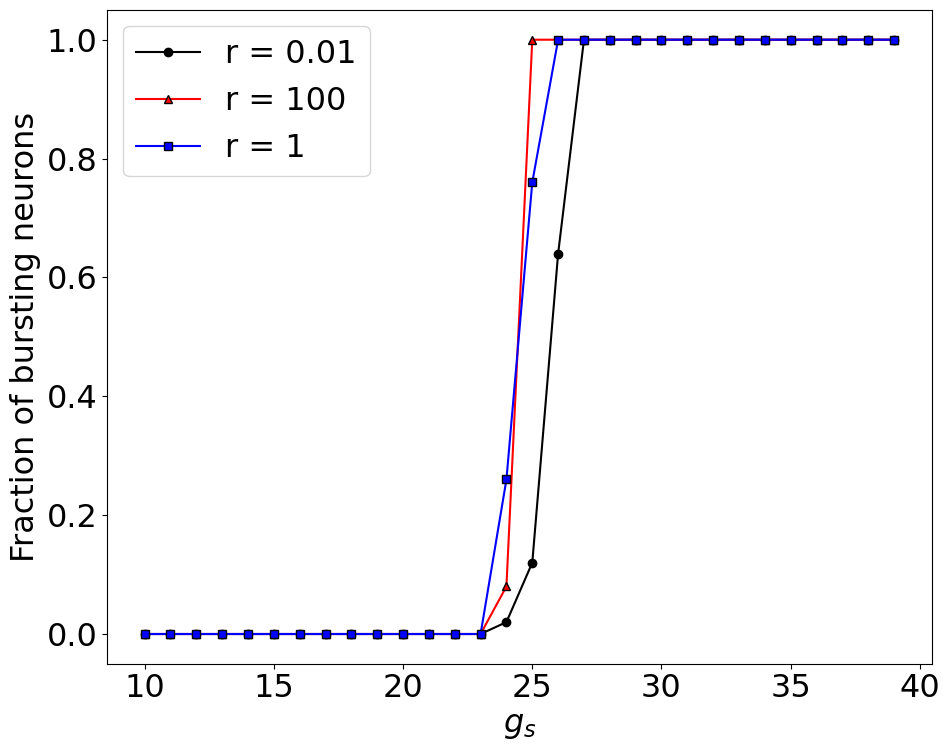

mega_cv_modular_mixed_0.01_percinh_0.1.pkl
mega_cv_modular_mixed_100_percinh_0.1.pkl
mega_cv_modular_mixed_1_percinh_0.1.pkl


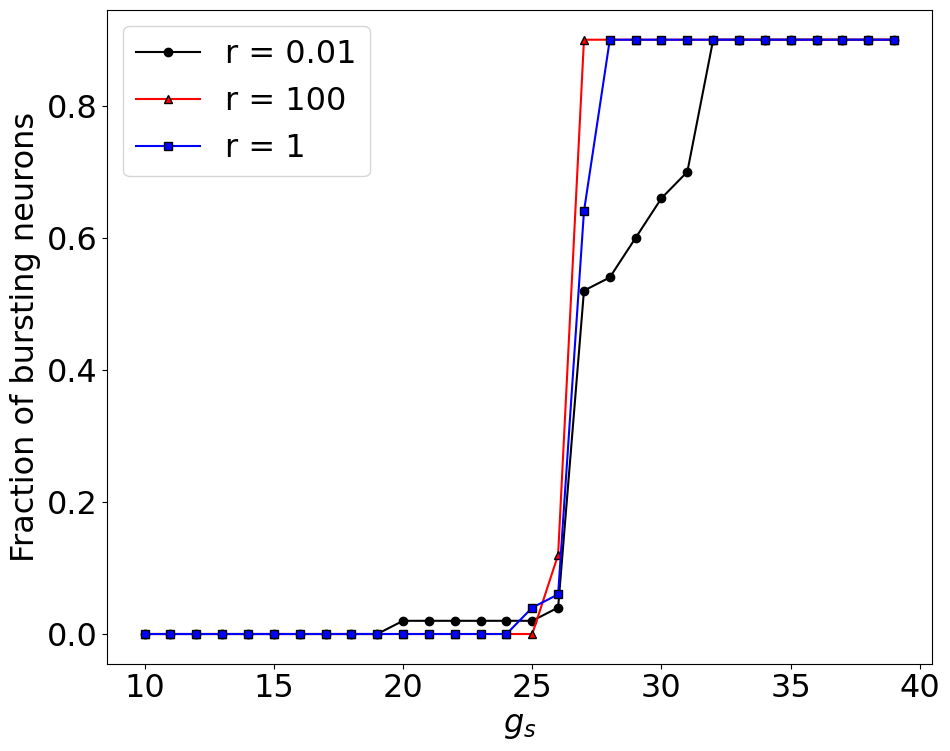

mega_cv_modular_mixed_0.01_percinh_0.2.pkl
mega_cv_modular_mixed_100_percinh_0.2.pkl
mega_cv_modular_mixed_1_percinh_0.2.pkl


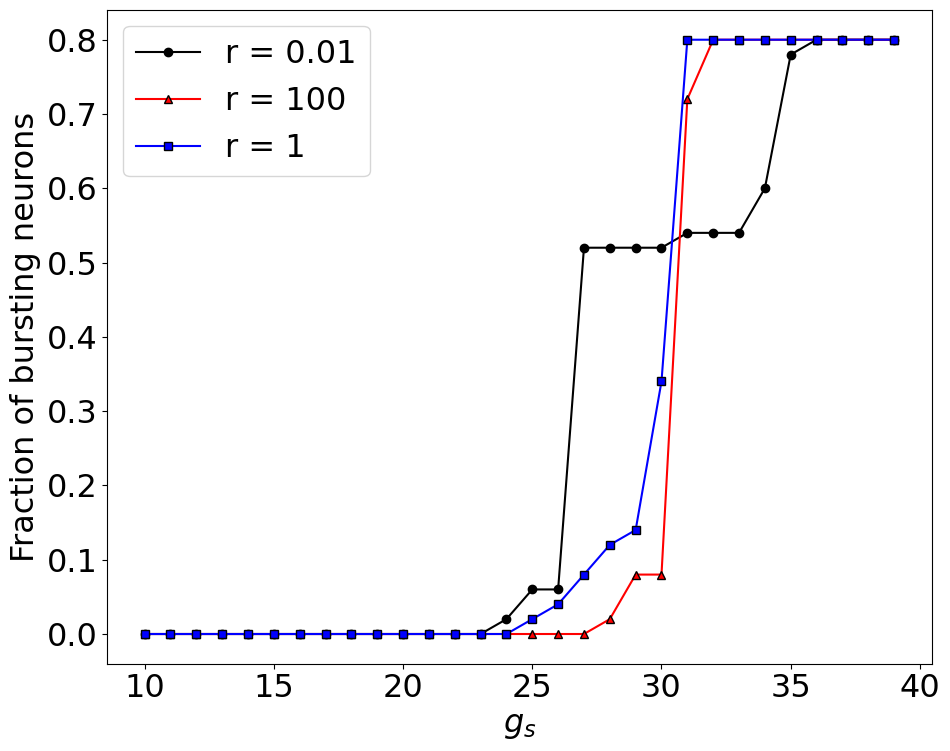

mega_cv_modular_mixed_0.01_percinh_0.3.pkl
mega_cv_modular_mixed_100_percinh_0.3.pkl
mega_cv_modular_mixed_1_percinh_0.3.pkl


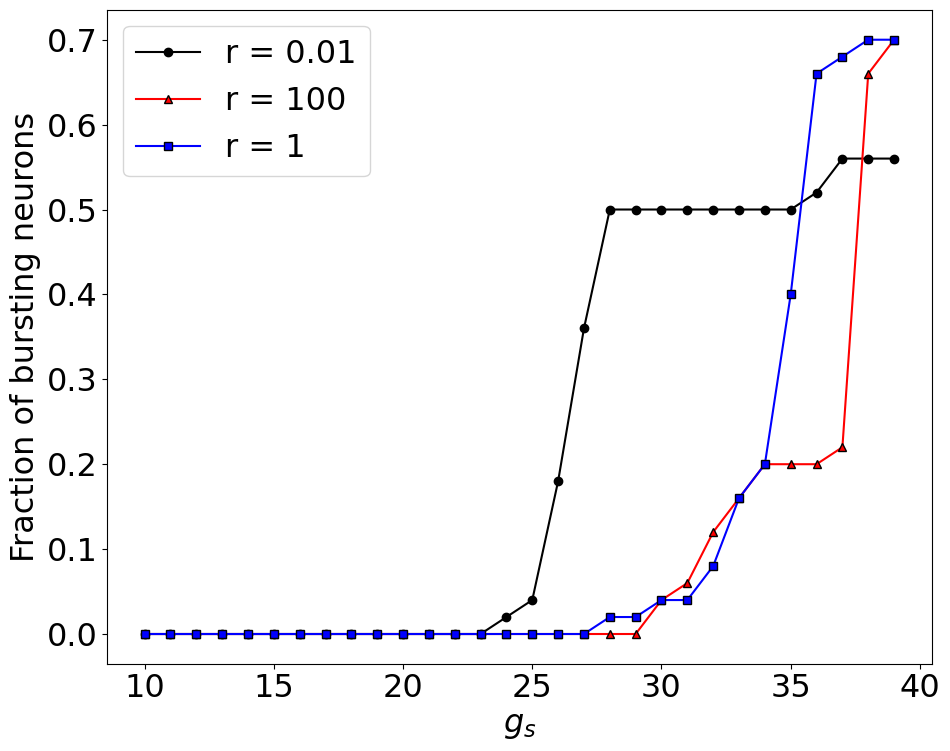

mega_cv_modular_mixed_0.01_percinh_0.5.pkl
mega_cv_modular_mixed_100_percinh_0.5.pkl
mega_cv_modular_mixed_1_percinh_0.5.pkl


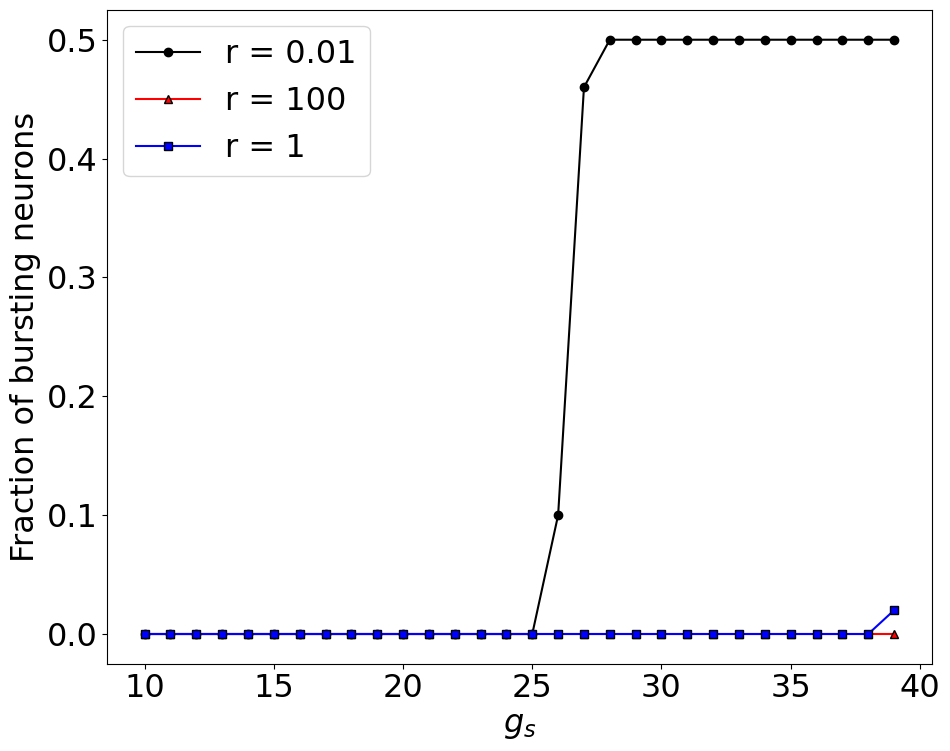

In [14]:
for perc in [0.0, 0.1, 0.2, 0.3, 0.5]:
    num_bursting(perc)

In [16]:
def plotting_op(percentage_inhibition):
    op_for_all_networks = []
    for file in os.listdir(pickle_directory):
        if file.startswith("mega_op") and f"percinh_{percentage_inhibition}" in file:
            with open(os.path.join(pickle_directory, file), "rb") as f:
                op_array = pickle.load(f)
                op_for_all_networks.append(op_array)
               

    mean_op_for_all_network = np.mean(op_for_all_networks, axis=1)

    plt.figure(figsize=(10, 8))
    for index, network in enumerate(range(3)):
        plt.plot(gs_array, mean_op_for_all_network[network], marker=marker_shape[index], color=color_list[index], mec="black", mfc=marker_color_list[index], label=labels_list[index])
    plt.xlabel("$g_s$")
    plt.ylabel("R")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"op_percinh_{percentage_inhibition}.png")
    plt.show()

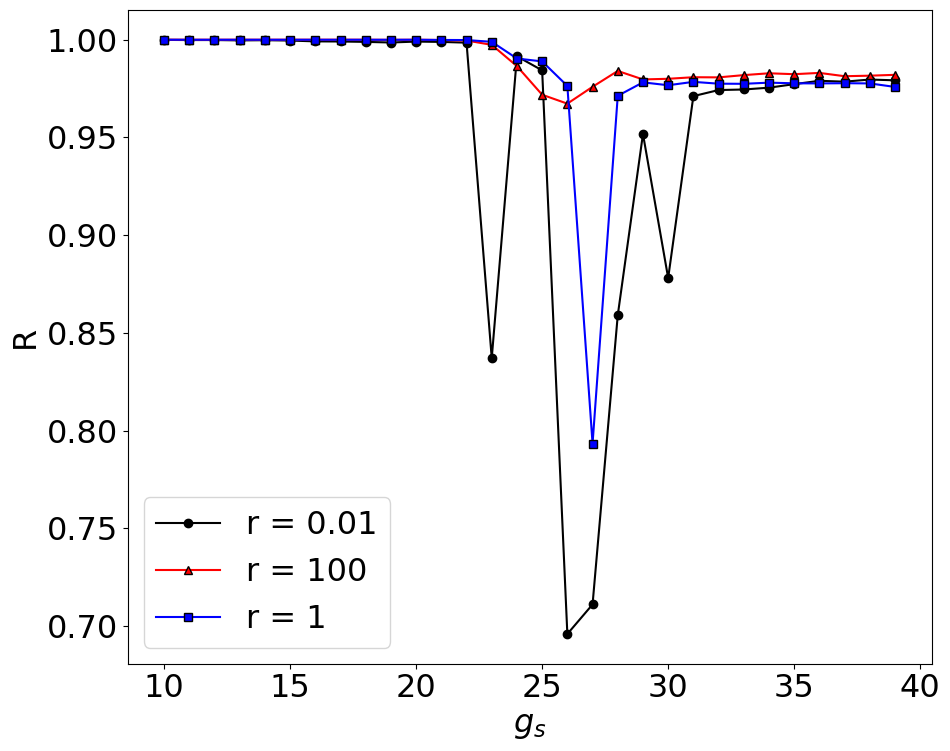

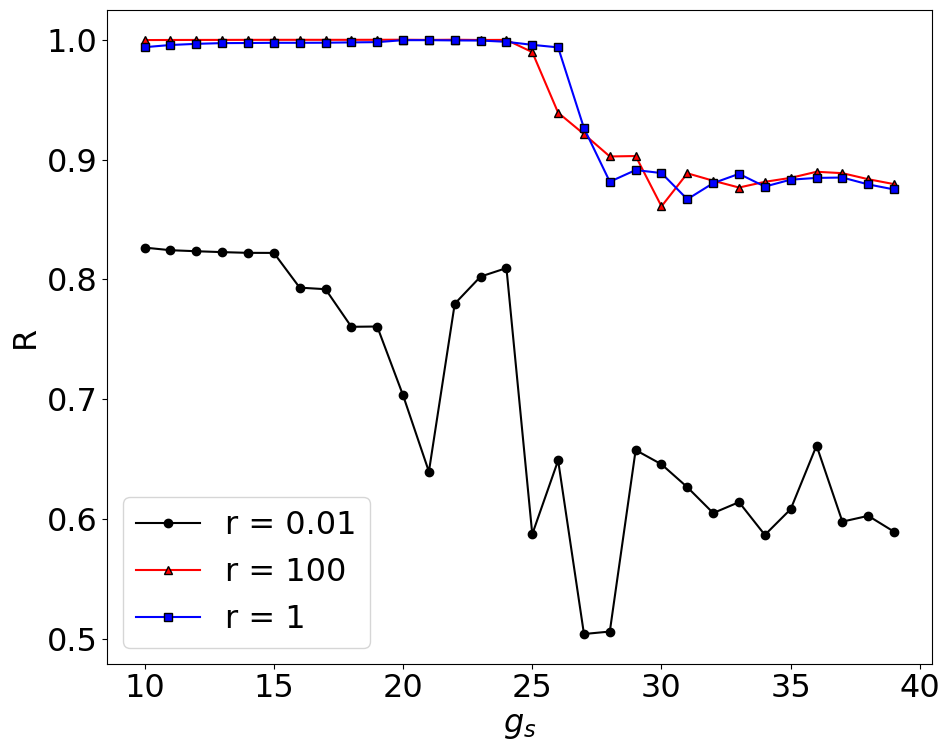

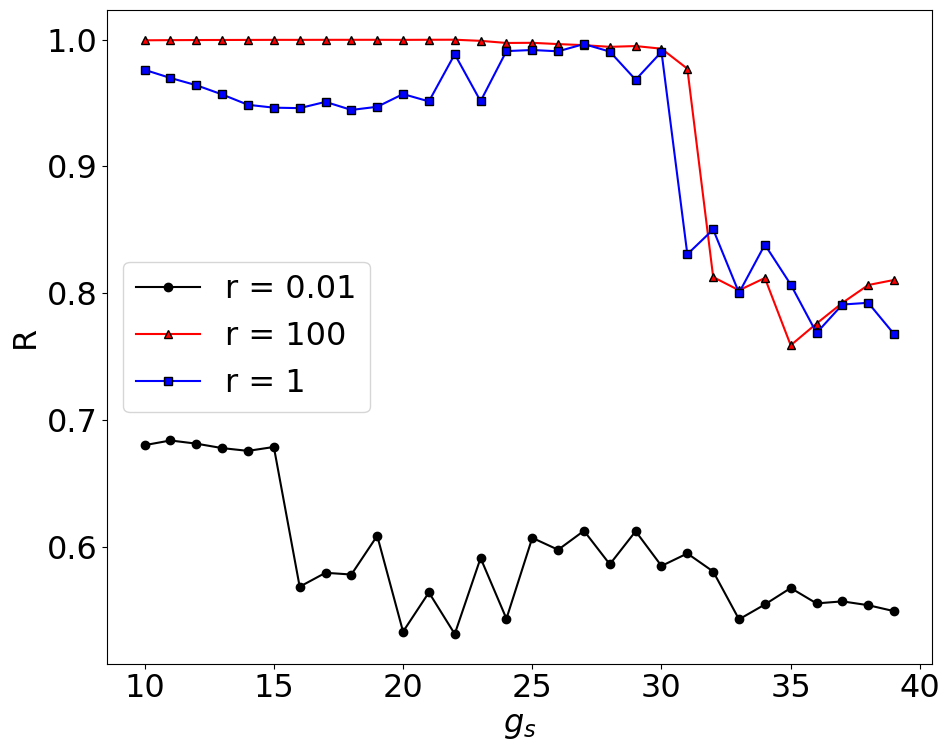

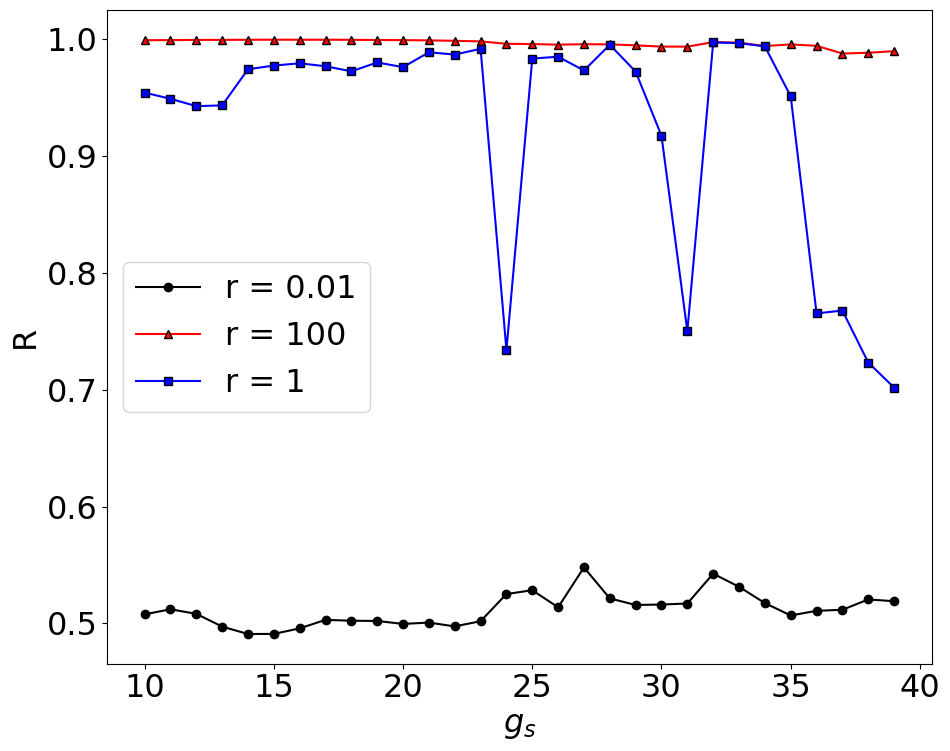

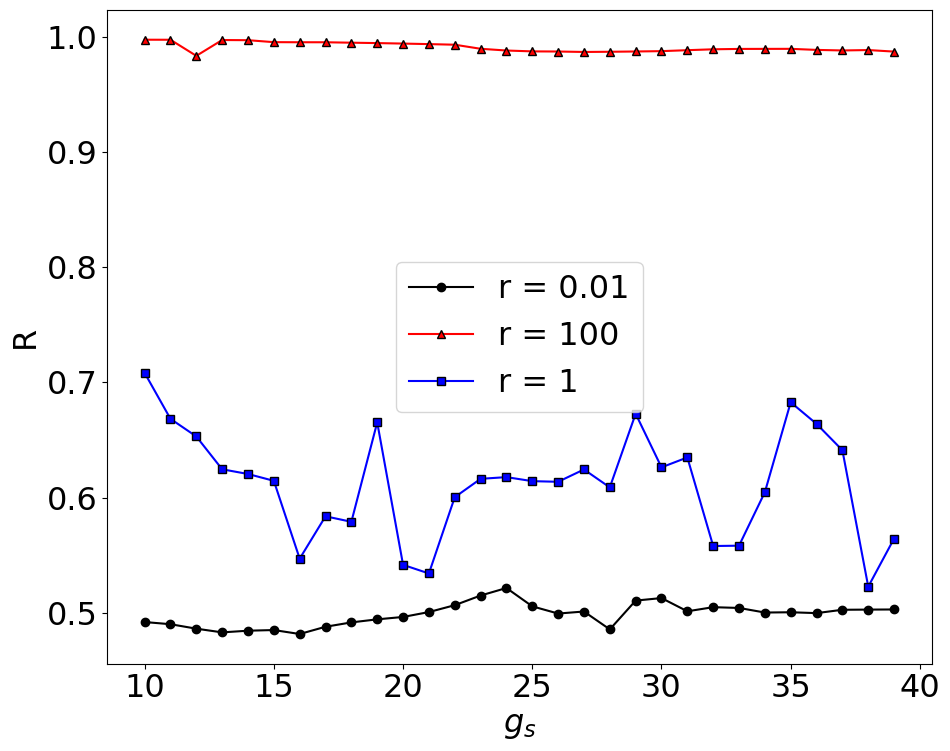

In [17]:
for perc in [0.0, 0.1, 0.2, 0.3, 0.5]:
    plotting_op(perc)

In [18]:
def firing_rate(percentage_inhibition):
    fir_for_all_networks = []
    for file in os.listdir(pickle_directory):
        if file.startswith("mega_fir") and f"percinh_{percentage_inhibition}" in file:
            with open(os.path.join(pickle_directory, file), "rb") as f:
                fir_array = pickle.load(f)
                fir_for_all_networks.append(fir_array)

    mean_fir_for_all_network = np.mean(fir_for_all_networks, axis=1)

    np.shape(mean_fir_for_all_network)

    plt.figure(figsize=(10, 8))
    for index, network in enumerate(range(3)):
        plt.plot(gs_array, np.mean(mean_fir_for_all_network[network], axis=1), marker=marker_shape[index], mec="black", mfc=marker_color_list[index], color=color_list[index], label=labels_list[index])
    plt.xlabel("$g_s$")
    plt.ylabel("Firing rate")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"fir_percinh_{percentage_inhibition}.png")
    plt.show()

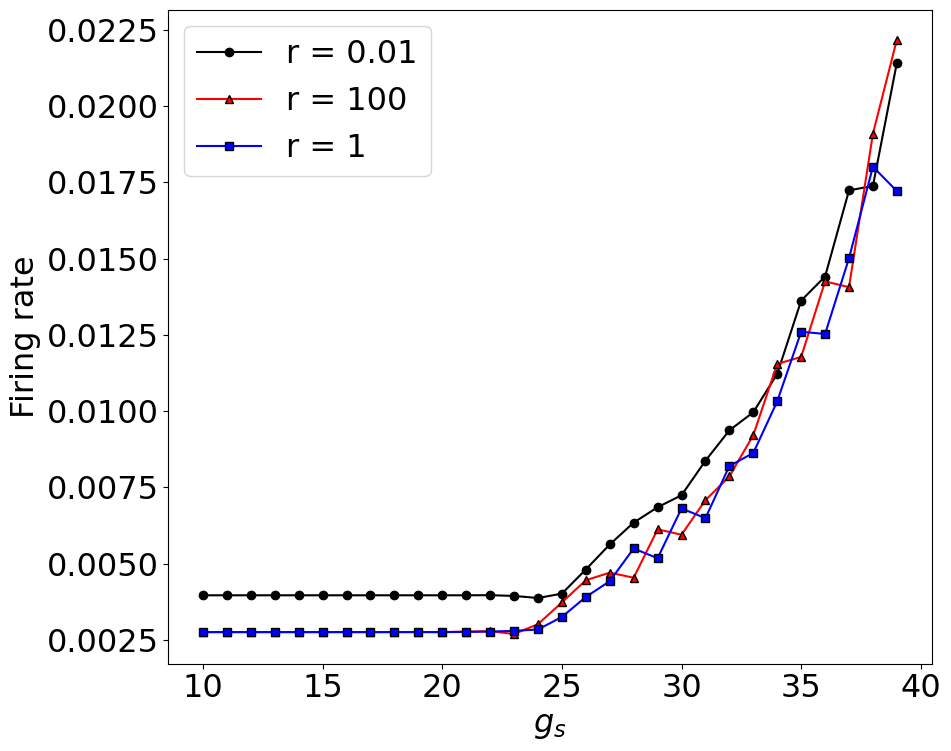

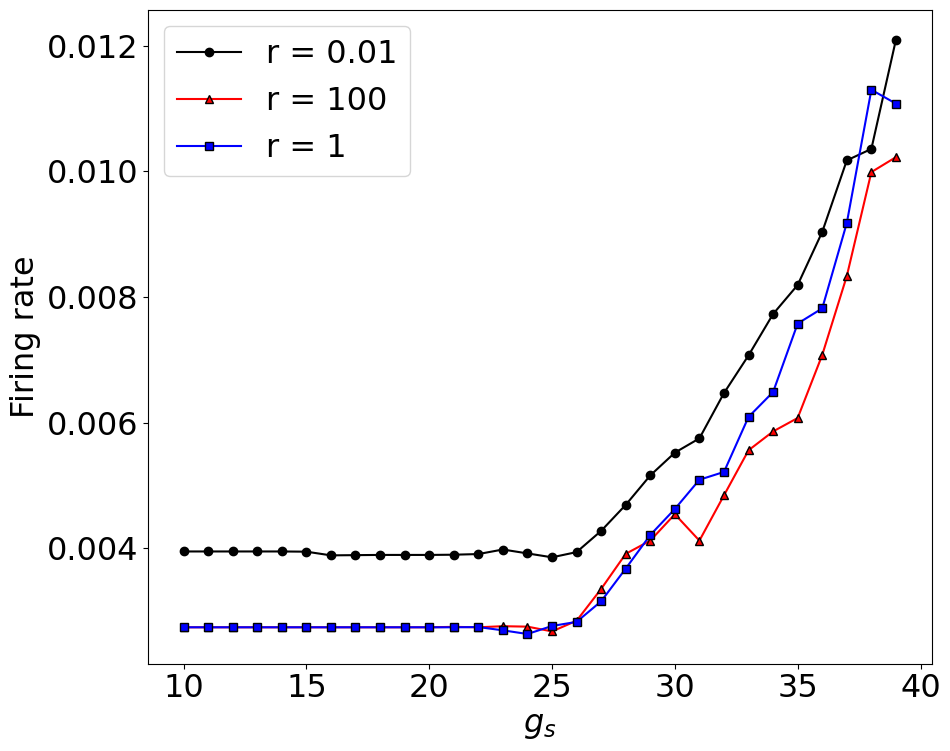

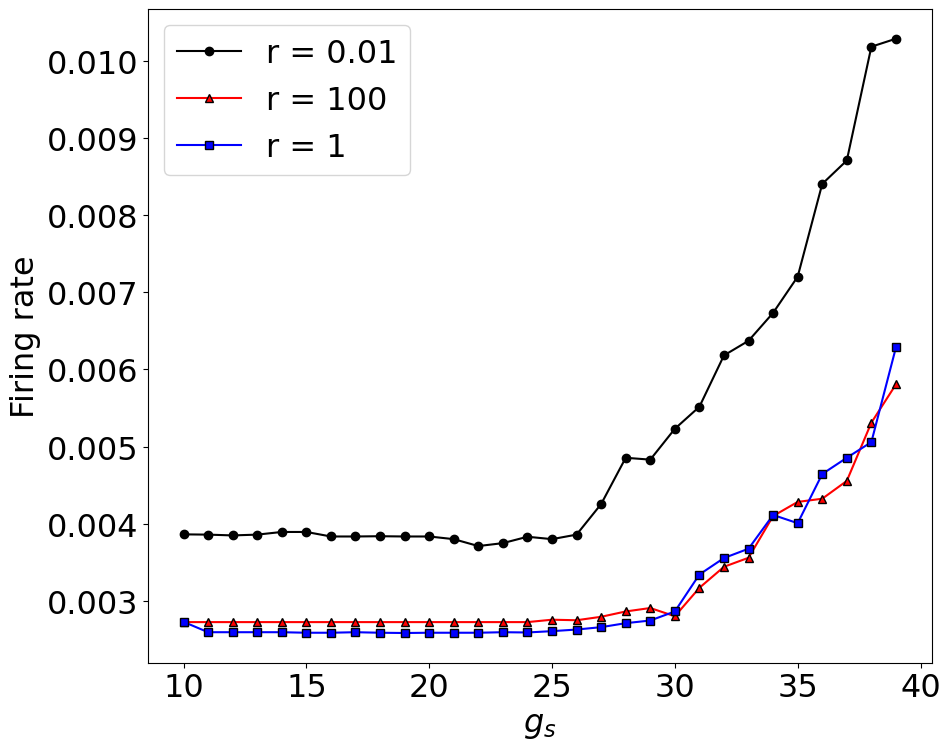

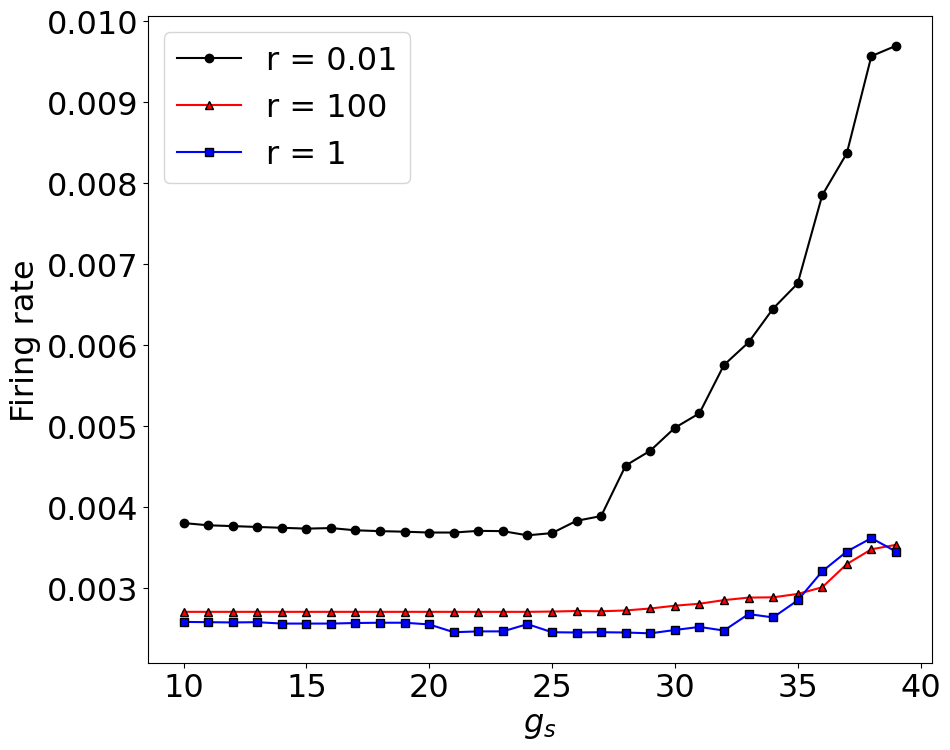

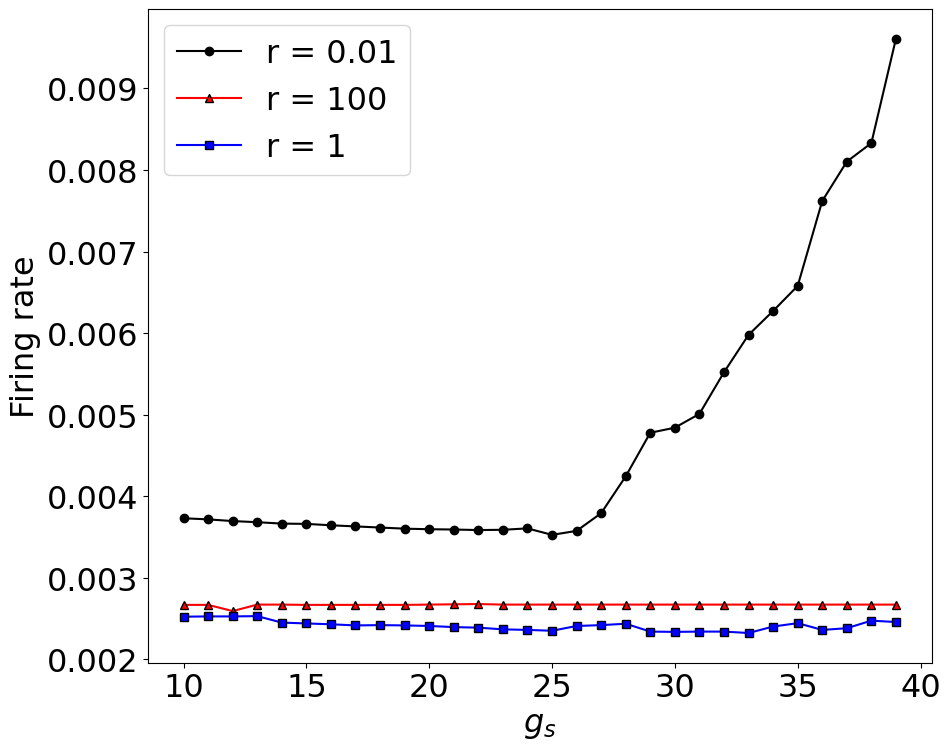

In [19]:
for perc in [0.0, 0.1, 0.2, 0.3, 0.5]:
    firing_rate(perc)